In [1]:
import matplotlib.pyplot as plt
import math
import essentia.standard
import librosa.feature
import librosa.display
import numpy as np
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
def read_melody_files(filename):
    with open(filename) as f:
        _notes = f.read()

    _notes = _notes.split(',')
    return [float(i) for i in _notes]

In [ ]:
def to_cents(song):
    cents = []
    for i, f in enumerate(song):
        cents.append(math.log2(song[i])*1200)
    return cents

In [ ]:
def to_semitones(cents):
    semitones = []
    for i, f in enumerate(cents):
        semitones.append(cents[i]/100)
    return semitones

In [ ]:
def to_octaves(semitones):
    octaves = []
    for i, f in enumerate(semitones):
        octaves.append(semitones[i]/12)
    return octaves

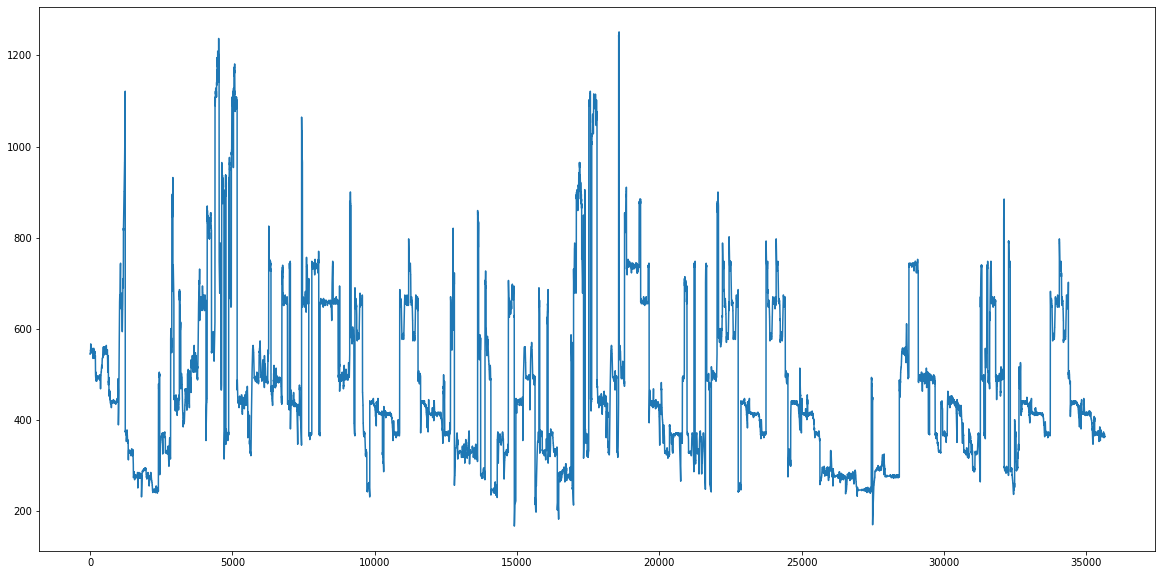

In [3]:
song = read_melody_files('dataset/melodies/strings/vocals/radioactive.txt')
song = [i for i in song if i != 0]
plt.figure(figsize=(20,10))
plt.plot(song)

In [ ]:
song_cents = to_cents(song)
plt.figure(figsize=(20,10))
plt.plot(song_cents)

In [ ]:
song_semitones = to_semitones(song_cents)
plt.figure(figsize=(20,10))
plt.plot(song_semitones)

In [ ]:
song_octaves = to_octaves(song_semitones)
plt.figure(figsize=(20,10))
plt.plot(song_octaves)

/home/el/.local/lib/python3.7/site-packages/librosa/core/pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


[Text(0.5, 1.0, 'Chromagram')]

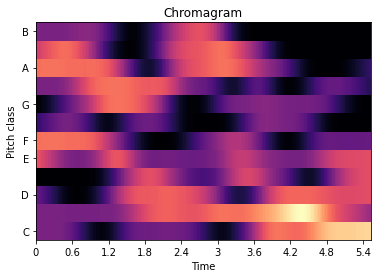

In [4]:
chroma = librosa.feature.chroma_cens(y=np.asarray(song), sr=44100, hop_length=50, n_octaves=1)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
#fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

/home/el/.local/lib/python3.7/site-packages/librosa/core/pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


[Text(0.5, 1.0, 'Chromagram')]

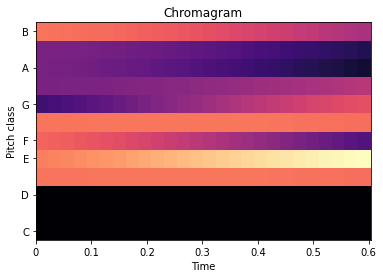

In [5]:
loader = essentia.standard.EqloudLoader(filename='dataset/hummings/Imagine Dragons - Radioactive.wav', sampleRate=44100)
audio = loader()
pitch_extractor = essentia.standard.PredominantPitchMelodia(frameSize=2048, hopSize=128)
pitch_values, pitch_confidence = pitch_extractor(audio)
pitch_values = pitch_values[pitch_values != 0]
chroma2 = librosa.feature.chroma_cens(y=np.asarray(pitch_values), sr=44100, hop_length=50, n_octaves=1)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma2, y_axis='chroma', x_axis='time', ax=ax)
#fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

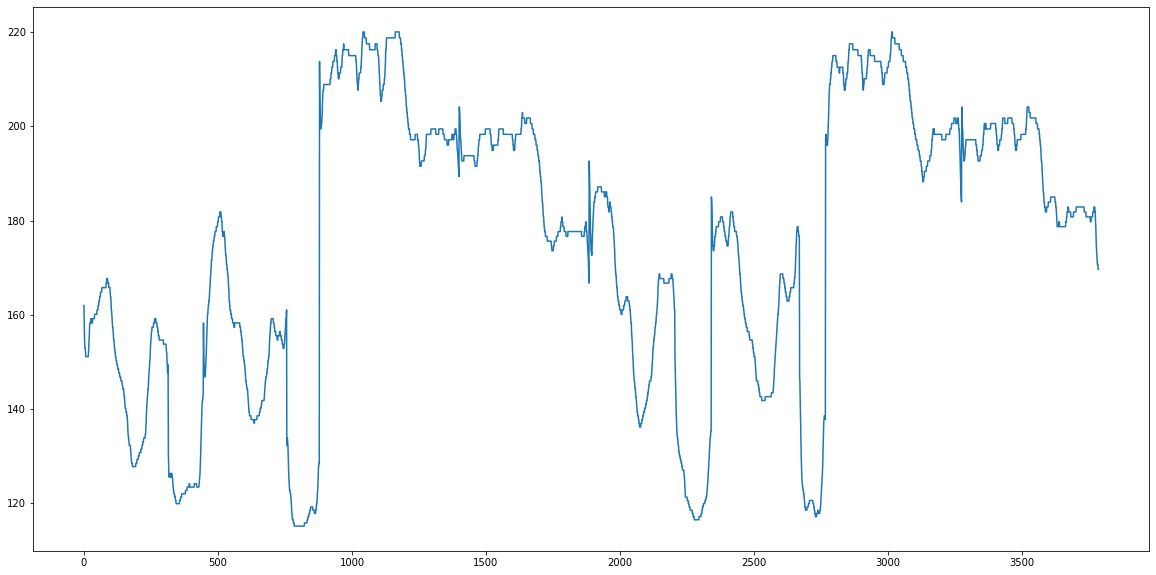

In [6]:
plt.figure(figsize=(20,10))
plt.plot(pitch_values)

In [ ]:
alignment = dtw(chroma2.transpose(), chroma.transpose(), step_pattern=rabinerJuangStepPattern(6, "c"), keep_internals=True, open_begin=False, open_end=True)

In [ ]:
alignment.distance